# Python for Finance

Below all modules are imported.

- *datetime* allows for the **start_date** and **end_date** to be specified.
- *pandas* is used to manipulate the data and is imported with the standard shorthand of *pd*.
- *numpy* is used for more advanced mathematics and is imported with the standard shorthand of *np*.
- *pandas_datareader.data* allows for the data to be read in and is imported as *web*.
- *matplotlib.pyplot* allows for plotting functionality and is imported with the standard shorthand of *plt*.
- From the *matplotlib* library, the style method is imported to allow us to adjust how figures are presented.
- To allow visualisations to appear inline, this is stated using *Jupyter magic*.

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

Writing the function **ticker_data** allows stock data to be retrievd through yahoo.

The **start_date** and **end_date** are now set through the datetime module.
This will allow us to retrieve data from 1st January 2019 to the current date.

The ticker to view is also defined. Here we are looking at Apple Inc. stocks.

In [2]:
def ticker_data(ticker, start_date, end_date):
    return web.get_data_yahoo(ticker, start_date, end_date)

In [3]:
ticker = "AAPL"
start_date = datetime(2012, 1, 1)
end_date = datetime.now()

data = ticker_data(ticker, start_date, end_date)

The *.head()* method allows for the first 5 rows of the dataframe to be displayed.

In [4]:
print(data.head())

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2012-01-03  58.928570  58.428570  58.485714  58.747143  75555200.0  51.115936
2012-01-04  59.240002  58.468571  58.571430  59.062859  65005500.0  51.390648
2012-01-05  59.792858  58.952858  59.278572  59.718571  67817400.0  51.961189
2012-01-06  60.392857  59.888573  59.967144  60.342857  79573200.0  52.504375
2012-01-09  61.107143  60.192856  60.785713  60.247143  98506100.0  52.421093


Similarly, the *.tail()* method allows for the last 5 rows of the dataframe to be displayed. The amount of rows displayed may however be adjusted by inserting the number of your choice into the method.

In [5]:
print(data.tail(7))

                  High         Low        Open       Close      Volume  \
Date                                                                     
2019-11-20  266.079987  260.399994  265.540009  263.190002  26558600.0   
2019-11-21  264.010010  261.179993  263.690002  262.010010  30348800.0   
2019-11-22  263.179993  260.839996  262.589996  261.779999  16331300.0   
2019-11-25  266.440002  262.519989  262.709991  266.369995  21005100.0   
2019-11-26  267.160004  262.500000  266.940002  264.290009  26301900.0   
2019-11-27  267.980011  265.309998  265.579987  267.839996  16308900.0   
2019-11-29  268.000000  265.899994  266.600006  267.250000  11654400.0   

             Adj Close  
Date                    
2019-11-20  263.190002  
2019-11-21  262.010010  
2019-11-22  261.779999  
2019-11-25  266.369995  
2019-11-26  264.290009  
2019-11-27  267.839996  
2019-11-29  267.250000  


The left column shows the **Date** of each entry and is the index column. We can see that entries are made one per day for weekday and weekend data in not present.

**High** represents the highest price a stock attained over the trading day.

**Low** represents the lowest price a stock attained over the trading day.

**Open** represents the opening price of the stock on the trading day.

**Close** represents the closing price of the stock on the trading day.

**Volume** represents the number of shares that changed hands during a given day.

**Adj Close** represents the adjusted closing price, analysing the stock's dividends, stock splits and new stock offerings to determine an adjusted value. The adjusted closing price reflects the change in stock value caused by new offerings from the corporation.

A brief overview of the data may be seen using the *.describe()* method on the dataframe.

In [6]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1991.000000,1991.000000,1991.000000,1991.000000,1.991000e+03,1991.000000
mean,126.328183,124.098538,125.221210,125.245220,5.980704e+07,118.769586
std,48.912934,48.125480,48.488664,48.557602,4.695670e+07,50.695538
min,57.085712,55.014286,55.424286,55.790001,1.136200e+07,49.259438
25%,86.473572,84.762856,85.671429,85.747856,2.765180e+07,75.432777
50%,113.750000,111.540001,112.529999,112.650002,4.393830e+07,105.517509
75%,163.889999,160.144997,162.370003,162.200005,7.514215e+07,157.625854
max,268.000000,265.899994,267.899994,267.839996,3.765300e+08,267.839996


Here we can see a variety of information such as the minimum, maximum and mean values of each column, alongside counts and standard deviations. By default, the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

A simple plot of the closing price may be plotted using the .plot() method on the "Close" column.

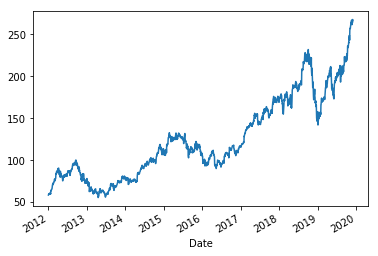

In [7]:
data["Close"].plot()

Using matplotlib, we can include a y-axis label and change the style of the plot.

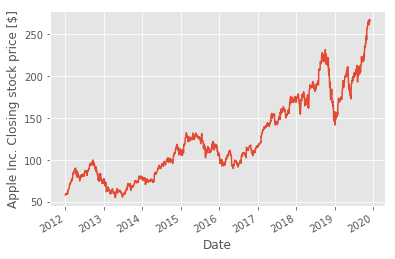

In [8]:
style.use("ggplot")

plt.figure()
data["Close"].plot()
plt.ylabel("Apple Inc. Closing stock price [$]")
plt.show()

A 20 and 50 day moving average may be determined and overplotted using the .rolling() and .mean() functions.

In [9]:
data["20ma"] = data["Adj Close"].rolling(window=20, min_periods=0).mean()
data["50ma"] = data["Adj Close"].rolling(window=50, min_periods=0).mean()
data.head()

,High,Low,Open,Close,Volume,Adj Close,20ma,50ma
Date,,,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,51.115936,51.115936,51.115936
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.390648,51.253292,51.253292
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.961189,51.489258,51.489258
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.504375,51.743037,51.743037
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.421093,51.878648,51.878648


It may be seen that this simply adds the corresponding columns to the end of the dataframe.

These may now be plotted alongside the Adjusted Close stock price to se the price trend over time.

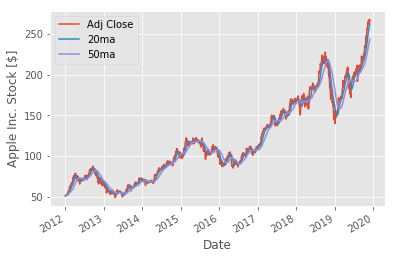

In [10]:
data["50ma"] = data["Adj Close"].rolling(window=50, min_periods=0).mean()
data[["Adj Close", "20ma", "50ma"]].plot()
plt.ylabel("Apple Inc. Stock [$]")
plt.show()

One is also able to display information across two figures. The top shows the same information as above but the bottom panel now displays the stock Volume over the same time range.

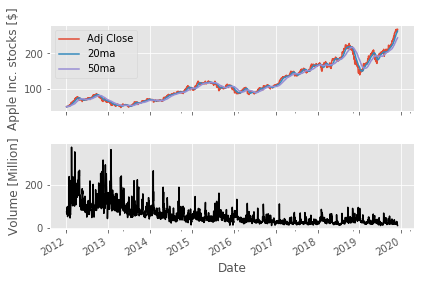

In [11]:
data["Volume"] = data["Volume"] / 1e6

fig = plt.figure()

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex=ax1)

data[["Adj Close", "20ma", "50ma"]].plot(ax=ax1)
data.plot(y="Volume", ax=ax2, c="black", legend=False)

ax1.set_ylabel("Apple Inc. stocks [$]")
ax2.set_ylabel("Volume [Million]")

plt.tight_layout()
plt.show()